In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
superstore = pd.read_excel('superstore.xlsx')
superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### About the Dataset
##### This dataset consists of historical sales data of a superstore company in USA. The feature of the data set are

* Row ID - Unique Idetification of each row
* Order ID - This is the unique identification of customer order
* Order Date - Date customer made the order
* Ship Date - Shipping Date
* Ship Mode - Mode of Shipping specifield by customer
* Customer ID - Unique identification of each customer
* Customer Name - Name of the Customer
* Segment - The segment each customer belong
* Country - Country of Recidence of Customer
* City - City of Residence of Customer
* State - State of Residence of Customer
* Poster Code - The poster code of customer address
* Region - Region of Customer
* Product ID - Unique product identification
* Category - This is the category of product ordered by customer
* Sub Category - This is the Sub category of product ordered by customer
* Product Name - The product orderd by Customer
* Sales - Revenue of Product
* Quantity - Product Quantity
* Discout - Discount on the product
* Profit - Profit/Loss Made on product

### Data Understanding Question
* Understanding the location of Customer in USA
* What are the contribution of product category to Sales and Profit
* Check for any promising states/cities/region to expand our business
* Does shipping mode have effect on sales and profit
* Does discount have any effect on sales and profit

In [4]:
# describing
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Preprocessing

In [5]:
# renaming some column with best practice by convention

superstore.rename(columns={'Row ID': 'Row_ID', 'Order ID': 'Order_ID', 'Order Date': 'Order_Date', 'Ship Date': 'Ship_Date'
                          ,'Ship Mode': 'Ship_Mode', 'Customer ID':'Customer_ID','Customer Name':'Customer_Name'
                          ,'Postal Code':'Postal_Code', 'Sub-Category': 'Sub_Category', 'Product Name': 'Product_Name'
                          }, inplace=True)
superstore.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
# formating order and shipping date
superstore['Order_month'] = superstore['Order_Date'].dt.month
superstore['Order_Day'] = superstore['Order_Date'].dt.day
superstore['Order_Year'] = superstore['Order_Date'].dt.year
superstore['Ship_month'] = superstore['Ship_Date'].dt.month
superstore['Ship_Day'] = superstore['Ship_Date'].dt.day
superstore['Ship_Year'] = superstore['Ship_Date'].dt.year
superstore.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.96,2,0.0,41.9136,11,8,2016,11,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.94,3,0.0,219.5820,11,8,2016,11,11,2016


In [7]:
# droping order and shipping date
superstore.drop(['Order_Date'], axis=1, inplace=True)
superstore.drop(['Ship_Date'], axis=1, inplace=True)
superstore.head(2)

,Row_ID,Order_ID,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,...,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,261.96,2,0.0,41.9136,11,8,2016,11,11,2016
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,731.94,3,0.0,219.5820,11,8,2016,11,11,2016


In [8]:
# visualization
def viz_Bar(df1 , cx , cy ,t='',rot="horizontal" , x=True ):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['Purple'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['Purple'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()
        

In [9]:
# print statement of some column
print('Total Customer: ' + str(superstore['Customer_Name'].unique().shape[0]))
print('--------------------------------------')
print('Total City: ' + str(superstore['City'].unique().shape[0]))
print('--------------------------------------')
print('Total Product Sold: ' + str(superstore['Quantity'].sum()))
print('--------------------------------------')
print('Total Revenue: ' + str(superstore['Sales'].sum()))
print('--------------------------------------')
print('Total Profit: ' + str(superstore['Profit'].sum()))
print('--------------------------------------')
print('Total Category: ' + str(superstore['Category'].unique().shape[0]))
print('--------------------------------------')
print('Total Segment: ' + str(superstore['Segment'].unique().shape[0]))
print('--------------------------------------')
print('Total State: ' + str(superstore['State'].unique().shape[0]))
print('--------------------------------------')
print('Total Product: ' + str(superstore['Product_Name'].unique().shape[0]))
print('--------------------------------------')
print('Total Sub_Category: ' + str(superstore['Sub_Category'].unique().shape[0]))

Total Customer: 793
--------------------------------------
Total City: 531
--------------------------------------
Total Product Sold: 37873
--------------------------------------
Total Revenue: 2297200.8603000003
--------------------------------------
Total Profit: 286397.0217
--------------------------------------
Total Category: 3
--------------------------------------
Total Segment: 3
--------------------------------------
Total State: 49
--------------------------------------
Total Product: 1850
--------------------------------------
Total Sub_Category: 17


In [10]:
# max sales, min sales, average sales
max_price = superstore['Sales'].max()
min_price = superstore['Sales'].min()
avg_price = superstore['Sales'].mean()

# print statement
print('Maximum Sales',max_price)
print('Minimum Sales',min_price)
print('Average Sales',avg_price)

Maximum Sales 22638.48
Minimum Sales 0.444
Average Sales 229.8580008304938


### Univarate Analysis

Text(0.5, 1.0, 'Sales Scatter plot')

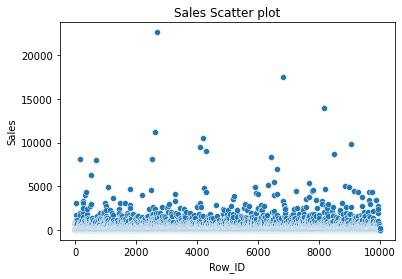

In [11]:
# ploting sales
sns.scatterplot(x=superstore['Row_ID'], y=superstore['Sales'])
plt.title('Sales Scatter plot')

#### 

<AxesSubplot:xlabel='Row_ID', ylabel='Profit'>

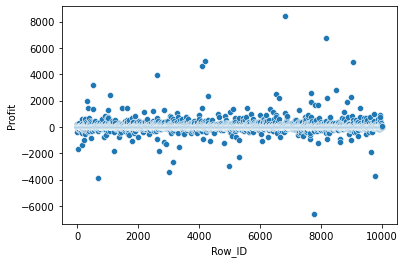

In [12]:
# ploting profit 
sns.scatterplot(x=superstore['Row_ID'], y=superstore['Profit'])

In [13]:
superstore['Region'].value_counts().to_frame()

,Region
West,3203
East,2848
Central,2323
South,1620


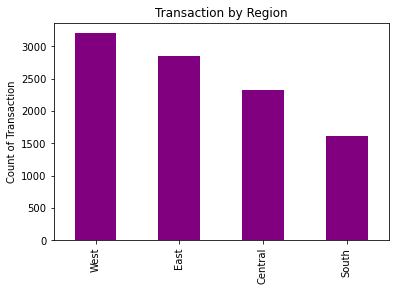

In [14]:
# plot of region
superstore['Region'].value_counts().plot.bar(color='Purple')
plt.title('Transaction by Region')
plt.ylabel('Count of Transaction')
plt.show()

#### West have the highest customer order follow by East, while South is the least.

In [15]:
# value_count of transaction by category
superstore['Category'].value_counts().to_frame()

,Category
Office Supplies,6026
Furniture,2121
Technology,1847


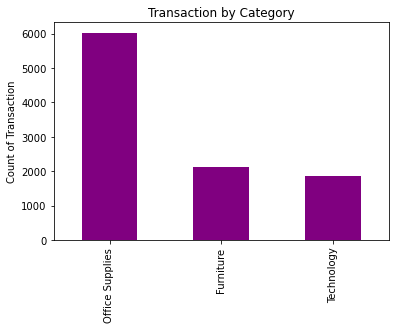

In [16]:
# ploting Transaction by category
superstore['Category'].value_counts().plot.bar(color='Purple')
plt.title('Transaction by Category')
plt.ylabel('Count of Transaction')
plt.show()

#### Office sumpplies is the most the damand category with 60 percent, follow by furniure and Technlogy

In [17]:
# value count of sub_category
superstore['Sub_Category'].value_counts().to_frame()

,Sub_Category
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466
Labels,364


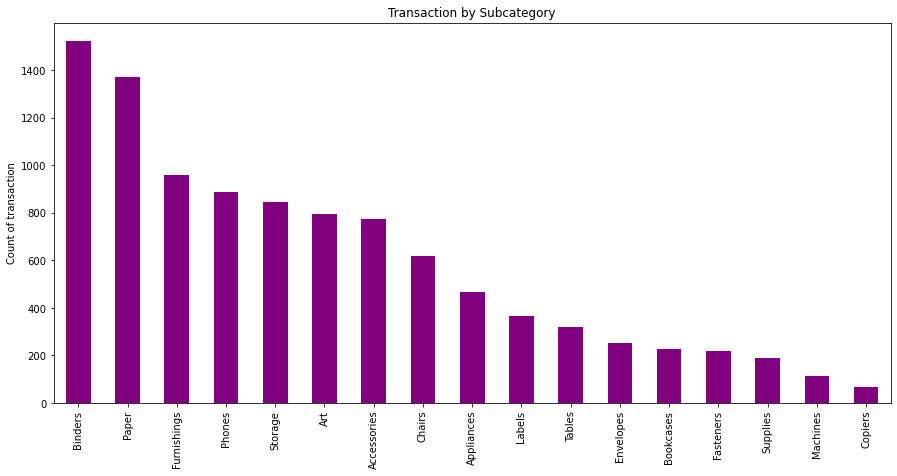

In [18]:
# ploting transaction by sub category
plt.figure(figsize=(15,7))
superstore['Sub_Category'].value_counts().plot.bar(color='Purple')
plt.title('Transaction by Subcategory')
plt.ylabel('Count of transaction')
plt.show()

#### Binders has highest in sub category, follow by paper and furnishing, while copiers is the Least

In [19]:
# value_count of shipping mode
superstore['Ship_Mode'].value_counts().to_frame()

,Ship_Mode
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


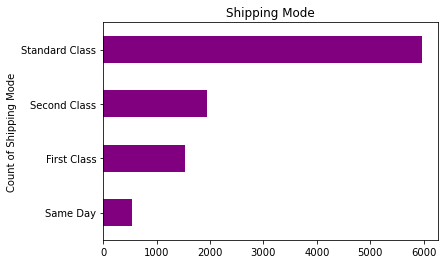

In [20]:
# ploting shipping mode
superstore['Ship_Mode'].value_counts().sort_values(ascending=True).plot.barh(color='Purple',)
plt.title('Shipping Mode')
plt.ylabel('Count of Shipping Mode')
plt.show()

In [21]:
# value_count of segment
superstore['Segment'].value_counts().to_frame()

,Segment
Consumer,5191
Corporate,3020
Home Office,1783


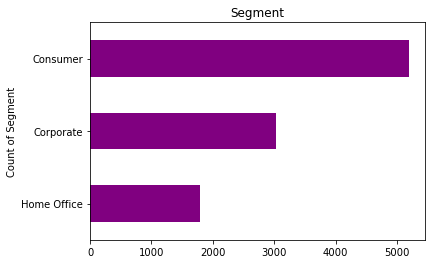

In [22]:
# ploting shipping mode
superstore['Segment'].value_counts().sort_values(ascending=True).plot.barh(color='Purple',)
plt.title('Segment')
plt.ylabel('Count of Segment')
plt.show()

## Check for any promising states/cities/region to expand our business?

In [23]:
# data frame of sales by state
superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).to_frame()

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


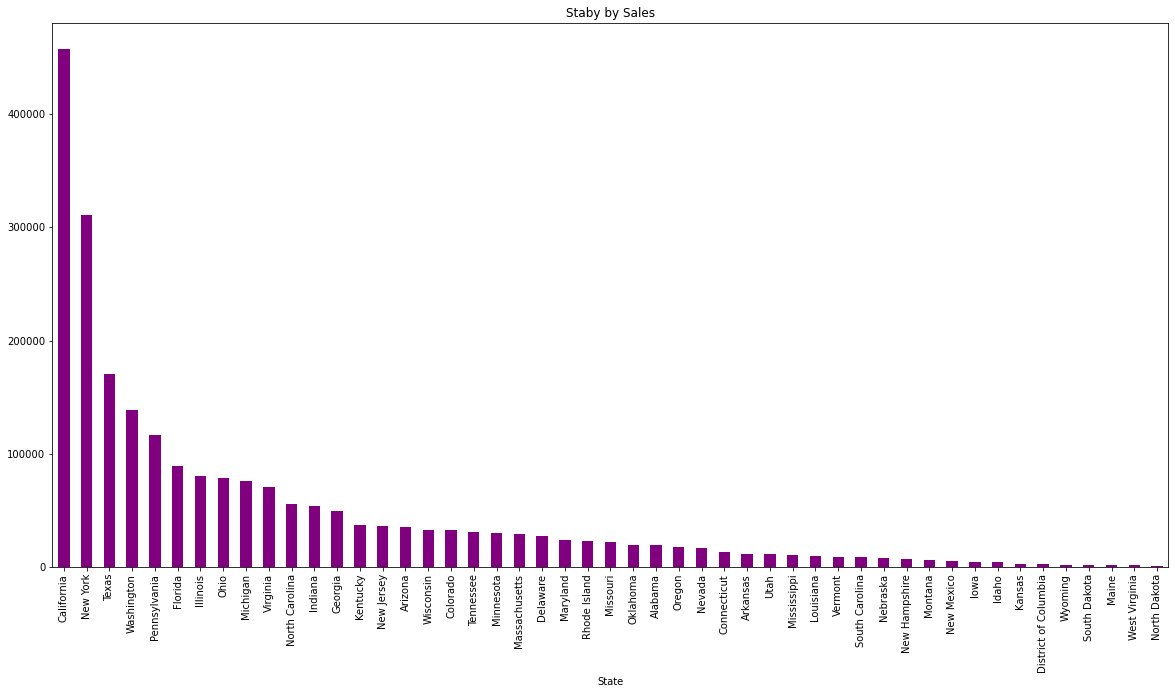

In [24]:
plt.figure(figsize=(20,10))
superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Staby by Sales") 
plt.show()

#### Califonia has the highest sales follow by New York and Texax, while Maine, West Virginia and North Dakota is least state by sales

In [25]:
# data frame of sales by state
superstore.groupby('State')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


#### Califonia has highest profit follow by New York and Washington

In [26]:
# information of non profitable state 
state_INFO = superstore.groupby("State").sum().reset_index()
state_INFO[state_INFO['Profit']<=0].sort_values(by = ['Profit'])

,State,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
41,Texas,5085541,75747693,170188.0458,3724,364.64,-25729.3563,7479,14834,1985440,7304,15976,1985462
33,Ohio,2355994,20579836,78258.1360,1759,152.40,-16971.3766,3695,7462,945396,3668,8081,945401
36,Pennsylvania,2768523,11190565,116511.9140,2153,192.90,-15559.9603,4484,8991,1183222,4500,8955,1183227
11,Illinois,2571481,29873772,80166.1010,1845,191.90,-12607.8870,3689,7999,991740,3670,7665,991748
31,North Carolina,1219177,6994384,55603.1640,983,70.60,-7490.9122,1951,3389,501936,1977,3597,501936
4,Colorado,797002,14613828,32108.1180,693,57.60,-6527.8579,1586,2840,366875,1590,2657,366877
40,Tennessee,1068141,6890574,30661.8730,681,53.30,-5341.6936,1495,2929,368924,1473,2945,368928
1,Arizona,1019876,19102126,35282.0010,862,68.00,-3427.9246,1798,3655,451495,1746,3954,451501
8,Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017,2880,5937,771997,2884,6230,772000
35,Oregon,652996,12072125,17431.1500,499,35.80,-1190.4705,1145,1906,249923,1166,1808,249923


### Region Analysis

In [27]:
# Region by sales
superstore.groupby('Region')['Sales'].sum().sort_values(ascending=False).to_frame()

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


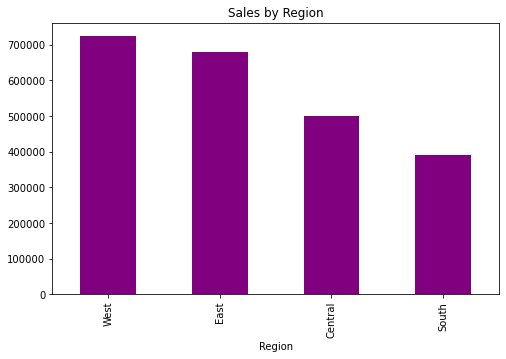

In [28]:
# ploting region by sales
plt.figure(figsize=(8,5))
superstore.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Sales by Region") 
plt.show()

#### West have the highest sale follow by East and Central, while south region is least

In [29]:
superstore.groupby('Region')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


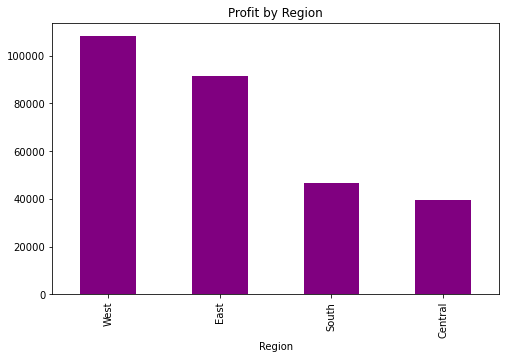

In [30]:
# Ploting profit by Region
plt.figure(figsize=(8,5))
superstore.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Profit by Region") 
plt.show()

#### West have the highest profit follow by East and South, while Centra region is least

### City Analysis

In [31]:
# city infomation 
city_INFO = superstore.groupby(['City']).sum().reset_index()
city_INFO

,City,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
0,Aberdeen,9261,57401,25.500,3,0.0,6.6300,11,11,2017,11,14,2017
1,Abilene,6990,79605,1.392,2,0.8,-3.7584,12,11,2017,12,13,2017
2,Akron,97234,930552,2729.986,65,7.5,-186.6356,143,305,42334,143,393,42334
3,Albuquerque,67175,1219470,2220.160,65,0.8,634.0881,105,263,28226,62,173,28230
4,Alexandria,47898,356864,5519.570,84,0.0,318.6183,55,249,32230,55,325,32230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Woonsocket,19448,11580,195.550,15,0.0,78.6791,34,72,8063,34,84,8063
527,Yonkers,74122,160515,7657.666,57,1.0,2767.7557,73,118,30230,73,181,30230
528,York,23392,87015,817.978,19,2.1,-102.1692,26,93,10082,26,115,10082
529,Yucaipa,3348,92399,50.800,5,0.0,13.2080,8,13,2015,8,20,2015


In [32]:
city_INFO[['City' , 'Sales']].sort_values(by=['Sales'] , ascending = False).head(10)

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


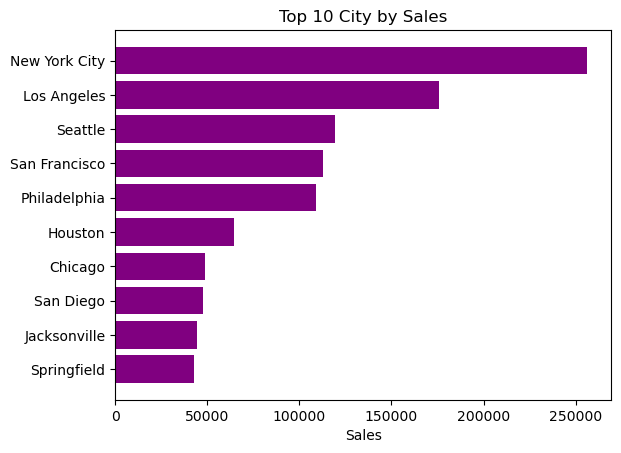

In [33]:
### tob 10 cities by sales
viz_Bar(city_INFO.sort_values(by=["Sales"],ascending=False)
        , 'City' , 'Sales' , 'Top 10 City by Sales' , 'horizontal',False)

#### New york City have the highest sales follow by Los Angeles and Seattle

In [34]:
# Bottom 10 city by sales
print('Bottom 10 City by Sales')
city_INFO[['City' ,'Sales']].sort_values(by = ["Sales"] ,ascending = True).head(10)

Bottom 10 City by Sales


,City,Sales
1,Abilene,1.392
140,Elyria,1.824
221,Jupiter,2.064
370,Pensacola,2.214
354,Ormond Beach,2.808
441,San Luis Obispo,3.620
463,Springdale,4.300
249,Layton,4.960
222,Keller,6.000
305,Missouri City,6.370


#### Abilene have the least sales follow by Elyria and Jupiter

In [35]:
# city by profit in data frame
city_INFO[['City' , 'Profit']].sort_values(by=['Profit'] , ascending = False).head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


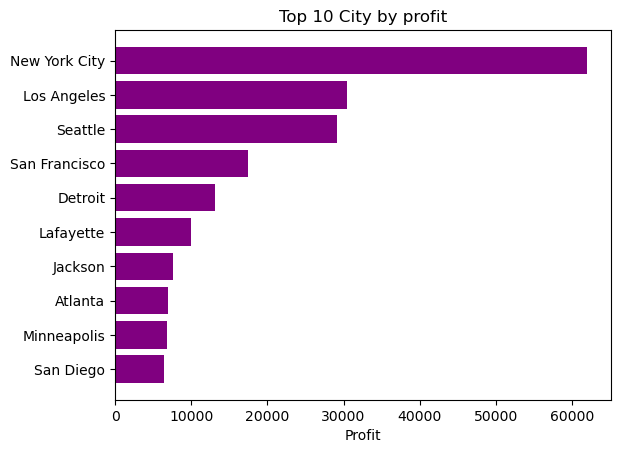

In [36]:
viz_Bar(city_INFO.sort_values(by=["Profit"],ascending=False)
        , 'City' , 'Profit' , 'Top 10 City by profit' , 'horizontal',False)

#### New york City have the highest Profit follow by Los Angeles and Seattle

In [37]:
# non profit city
city_INFO[city_INFO['Profit']<=0].sort_values(by = ['Profit']).head(10)

,City,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
374,Philadelphia,2531454,10275302,109077.0130,1981,175.50,-13837.7674,4154,8072,1082439,4179,7950,1082443
207,Houston,2017125,29052387,64504.7604,1466,143.14,-10153.5485,2865,5654,759884,2889,6386,759884
434,San Antonio,263170,4614213,21843.5280,247,22.60,-7299.0502,423,774,118898,423,1020,118898
241,Lancaster,257562,1980720,9891.4640,171,14.50,-7239.0684,380,801,92736,364,732,92738
80,Chicago,1643465,19037248,48539.5410,1132,120.50,-6654.5688,2356,4995,632953,2363,5008,632956
60,Burlington,153431,516678,21668.0820,105,3.40,-3622.8772,183,386,50416,174,384,50417
109,Dallas,829321,11802703,20131.9322,555,56.30,-2846.5257,1218,2407,316511,1178,2437,316516
375,Phoenix,309092,5356449,11000.2570,224,22.30,-2790.8832,535,1121,126997,473,1112,127003
24,Aurora,310805,4777612,11656.4780,258,24.00,-2691.7386,522,1208,137080,541,889,137080
216,Jacksonville,599775,3843200,44713.1830,429,35.85,-2323.8350,901,1646,251976,886,1853,251978


####  From the table above, it show that the company is loosing money in 116 City

### From the various EDA on States, Region and Cities on the question of promising state/region/citities to expand our business.
#### checking the effect of state/region/cities on revenue and profit in order to discover promising state for business expansion

Findings on the state show that Califonia has the highest revenue with 457,687, followed by New-York and Texas and North Dakota
is the least state with revenue of 919.9, on the profit, Califonia has the highest, followed by New-York and Washington and the
the least is Wyoming.The business is loosing money in nine state, out of these state, Texas, Ohio, Pennsylvania and Illinois which are among top ten revenue state, are among the state the company is loosing money, Texas has the highest followed Ohio and Pennsylvania.

On the Region, the four region is performing well on revenue, West-region has the highest followed by East and Central region, for the profit, West-region has the highest followed by East and Central region.

On the cities, New-York city has the highest revenue followed by Los-Angeles and Seattle and the least state is Abilene and for the profit New-York city has the highest profit followed by Los-Angeles and Seattle.
Out of the 531 City, the business is loosing money in 116 city, four out of the top ten cities with highest revenue are among the the city, Philadelphia is the highest followed by Houston, and San Antonio.

The state can consider expansion of business in following state New-York, Washington, Michigan and Virginia

### Product Analysis

In [38]:
# product infomation
pro_info = superstore.groupby(['Product_Name']).sum().reset_index()
pro_info.head(2)

,Product_Name,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
0,"""While you Were Out"" Message Book, One Form pe...",12814,192854,25.228,8,0.4,10.3880,30,46,6051,31,28,6051
1,"#10 Gummed Flap White Envelopes, 100/Box",14512,156773,41.300,11,0.4,16.7678,26,57,8064,27,49,8064


In [39]:
# product by quantity column
superstore.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(20).to_frame()

,Quantity
Product_Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


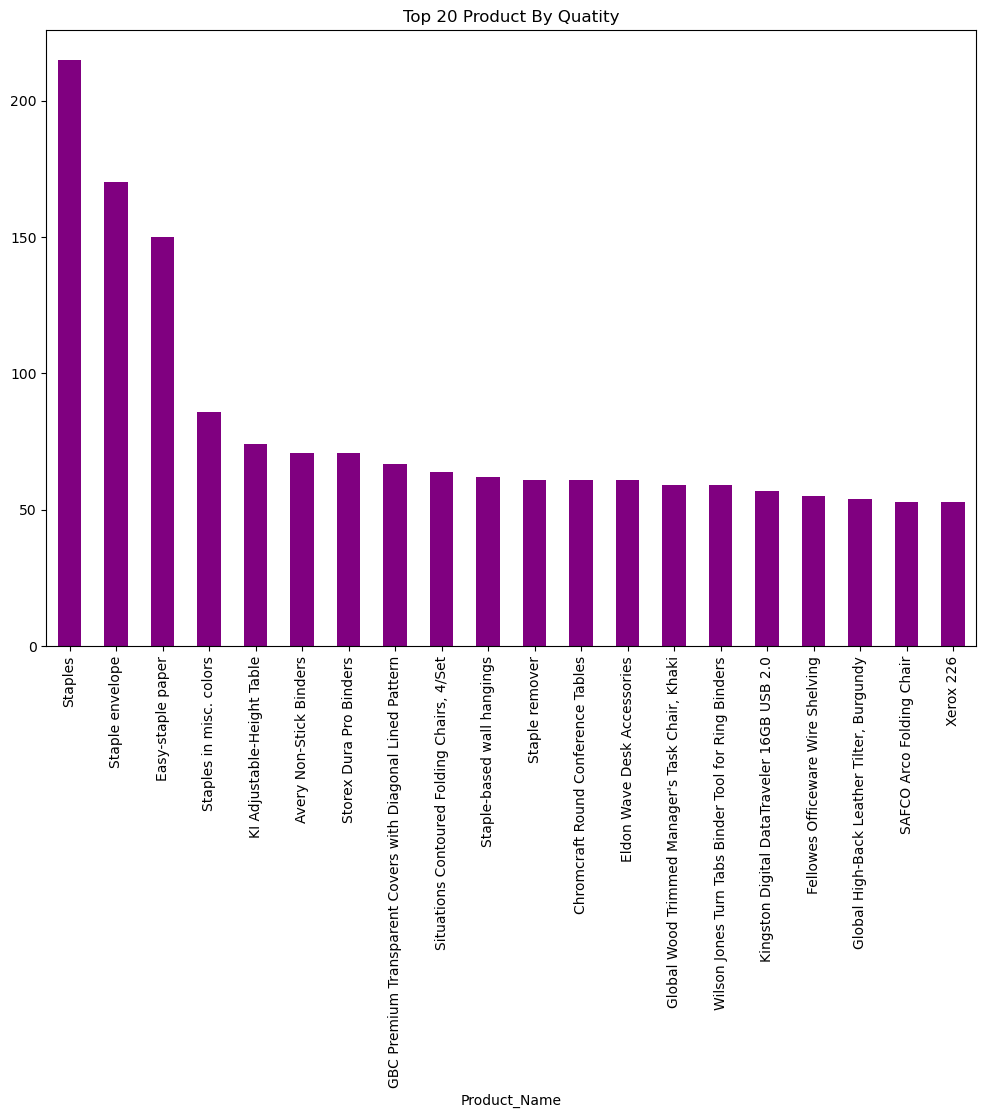

In [40]:
plt.figure(figsize=(12,8))
superstore.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(20).plot.bar(color='Purple')
plt.title("Top 20 Product By Quatity") 
plt.show()

#### The Highest product sold is Staples follow by Staple envelope and Easy-staple-paper

In [41]:
# top 10 product by sales
pro_info[['Product_Name' , 'Sales']].sort_values(by=['Sales'] , ascending = False).head(10)

,Product_Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


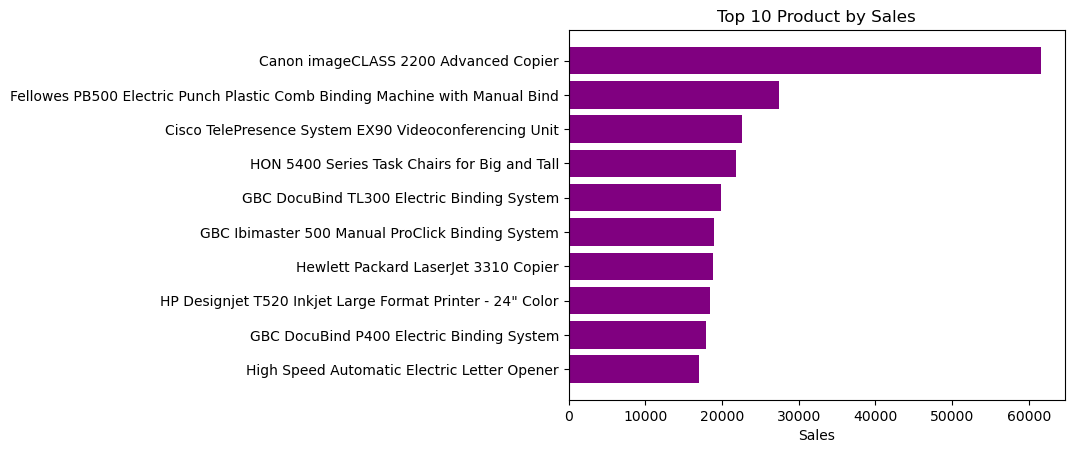

In [42]:
# top 10 product by sales
viz_Bar(pro_info.sort_values(by=["Sales"],ascending=False)
        , 'Product_Name' , 'Sales' , 'Top 10 Product by Sales' , 'horizontal',False)

#### The highest product by revenue is Canon imageCLASS 2200 Advanced Copier, follow by Fellowes PB500 Electric Punch Plastic Comb Bin and Cisco TelePresence System EX90 Videoconferencinng Unit.

In [43]:
# bottom 10 product by sales
print('Bottom 10 Product by Sales')
pro_info[['Product_Name' , 'Sales']].sort_values(by=['Sales'] , ascending = True).head(10)

Bottom 10 Product by Sales


,Product_Name,Sales
605,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
208,Avery 5,5.760
1793,Xerox 20,6.480
784,Grip Seal Envelopes,7.072
253,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
249,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
1780,Xerox 1989,7.968
27,4009 Highlighters,8.040
1509,Stockwell Gold Paper Clips,8.096
1113,Newell 308,8.400


In [44]:
# top 10 product by profit
pro_info[['Product_Name' , 'Profit']].sort_values(by=['Profit'] , ascending = False).head(10)

,Product_Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


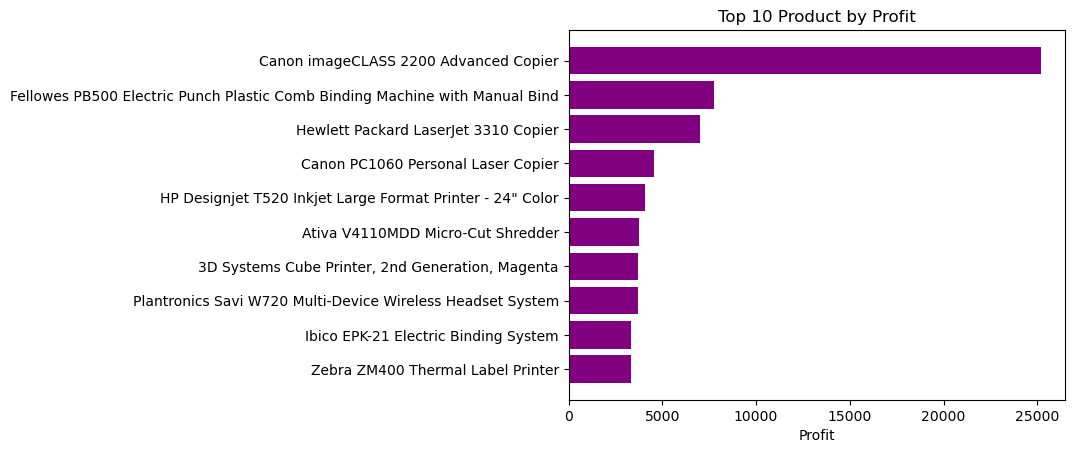

In [45]:
# top ten product by product
viz_Bar(pro_info.sort_values(by=["Profit"],ascending=False)
        , 'Product_Name' , 'Profit' , 'Top 10 Product by Profit' , 'horizontal',False)

#### Canon imageCLASS 2200 Advanced Copier has the highest profit follow by Fellowes PB500 Electric Punch Plastic Comb and Hewlett Packard LaserJet 3310 Copier	

In [46]:
# non profit product
pro_info[pro_info['Profit']<=0].sort_values(by = ['Profit'])

,Product_Name,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
475,Cubify CubeX 3D Printer Double Head Print,15144,180295,11099.963,9,1.60,-8.879970e+03,27,41,6048,28,23,6048
985,Lexmark MX611dhe Monochrome Laser Printer,4419,283475,16829.901,18,1.60,-4.589973e+03,23,51,8062,23,66,8062
476,Cubify CubeX 3D Printer Triple Head Print,684,27217,7999.980,4,0.50,-3.839990e+03,11,4,2017,11,4,2017
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,28061,249689,9917.640,27,1.40,-2.876116e+03,35,77,10079,36,66,10079
376,Bush Advantage Collection Racetrack Conference...,34550,337602,9544.725,33,2.45,-1.934398e+03,36,120,14111,38,95,14111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,Premier Electric Letter Opener,41844,405429,2641.608,24,0.60,-7.105427e-15,63,149,16131,63,182,16131
767,Global Super Steno Chair,28826,464678,2389.902,30,1.00,-1.776357e-15,58,124,14108,59,121,14108
309,Belkin OmniView SE Rackmount Kit,6651,20044,248.360,7,0.00,0.000000e+00,23,15,4033,23,25,4033
269,"Avery Trapezoid Extra Heavy Duty 4"" Binders",19049,286886,314.550,15,1.80,0.000000e+00,29,70,8060,30,48,8060


#### The table show that the company is lossing money on 304 product

### Sub-Category Analysis

#### What are the contribution of Sub_category to Sales and Profit


In [47]:
# sub category by sales
superstore.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).to_frame()

,Sales
Sub_Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


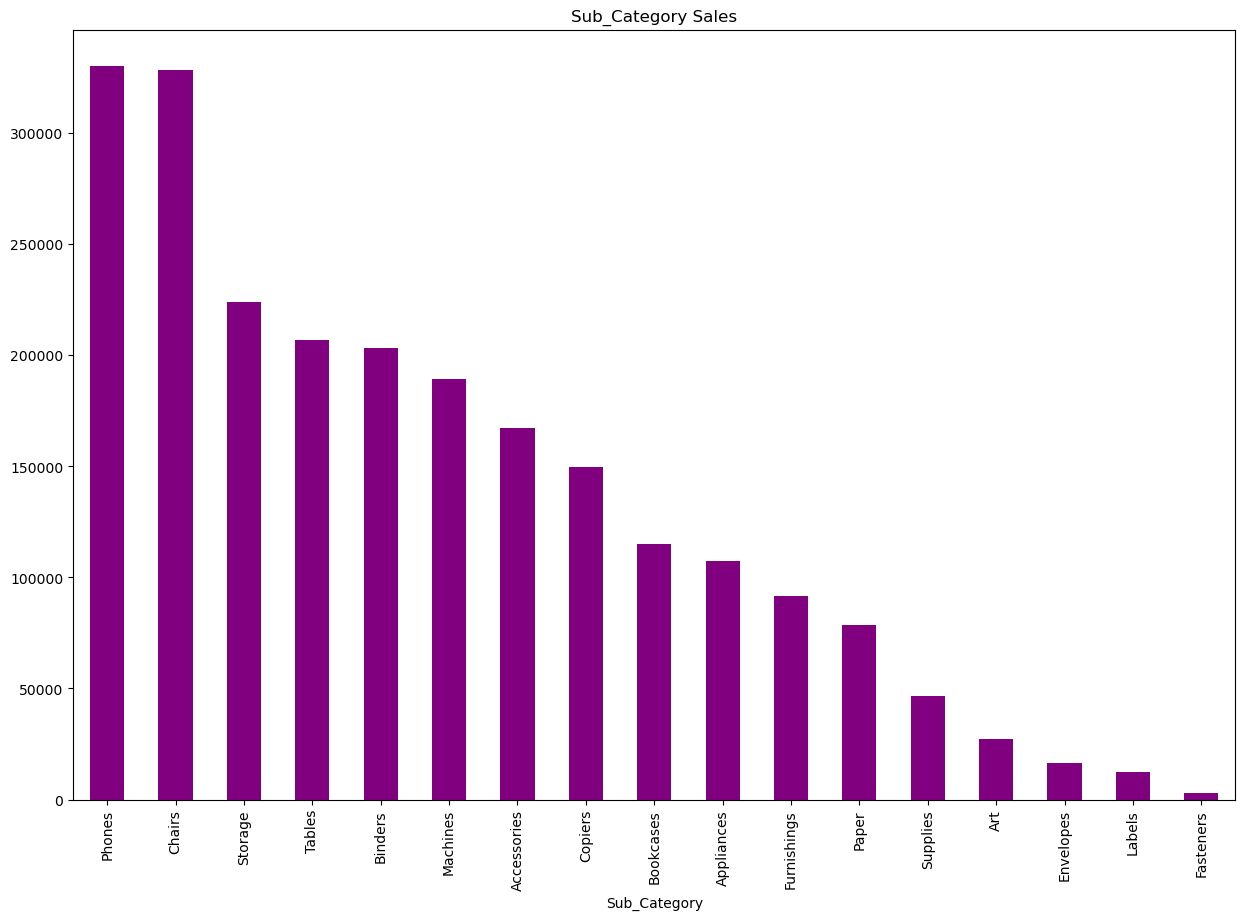

In [48]:
plt.figure(figsize=(15,10))
superstore.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Sub_Category Sales") 
plt.show()

#### Phone has the highest revenue follow by chairs and Storage.

In [49]:
# sub category by profit
superstore.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Sub_Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


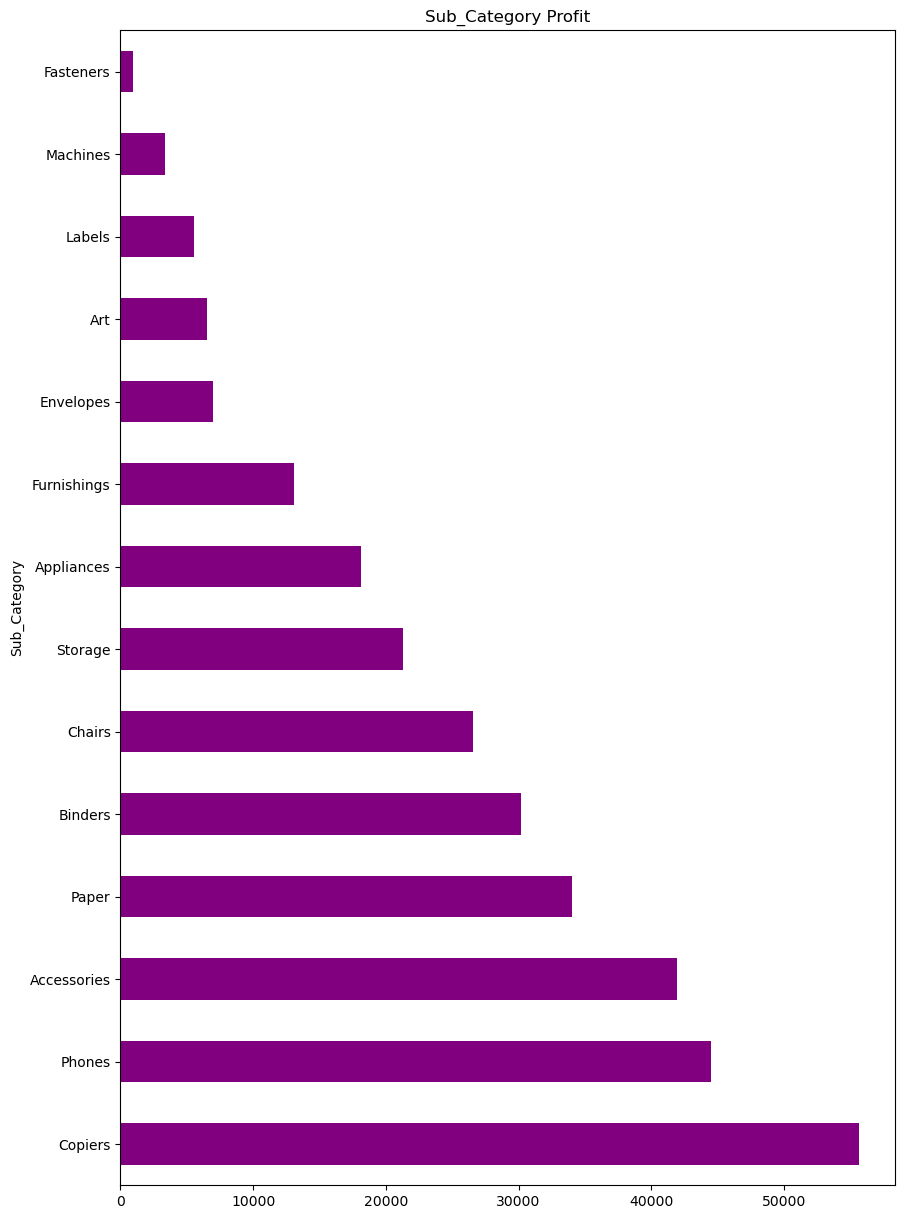

In [50]:
plt.figure(figsize=(10,15))
superstore.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(14).plot.barh(color='Purple')
plt.title("Sub_Category Profit") 
plt.show()

#### Copiers have the higest profit follow by phone and Accessories.

In [51]:
# non profit product sub Category
sub_info = superstore.groupby(['Sub_Category']).sum().reset_index()
sub_info[sub_info['Profit']<=0].sort_values(by = ['Profit'])

,Sub_Category,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Order_month,Order_Day,Order_Year,Ship_month,Ship_Day,Ship_Year
16,Tables,1572664,18607828,206965.5320,1241,83.35,-17725.4811,2524,4825,643008,2532,5088,643010
4,Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560,1745,3727,459589,1716,3648,459594
15,Supplies,993554,10633558,46673.5380,647,14.60,-1189.0995,1502,3146,382988,1454,3170,382994


#### The contribution of sub_category to sales and product show 
Phone has the the highest revenue, followed by Chairs and Storage, while the least is Fasteners, for profit, Copiers has the highest, followed by phone and Accessories.

Tables, Bookcases and Suppliers sub_Category is not contributing to the business, the company is loosing money in this sub-category.


### Segment Analysis

#### Consumer segment has the highest sales

In [52]:
superstore.groupby('Segment')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


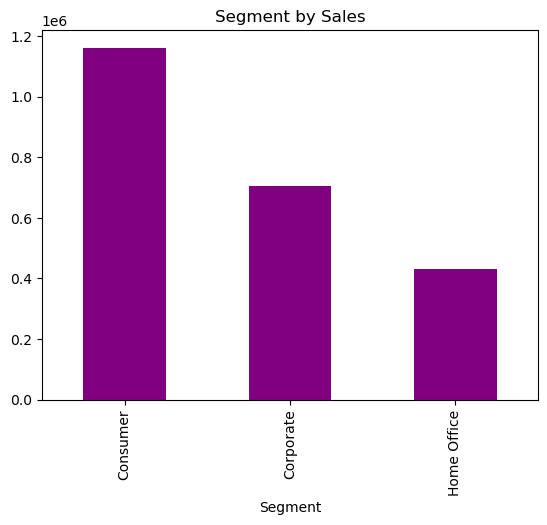

In [53]:
# segment by sales
superstore.groupby('Segment')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Segment by Sales") 
plt.show()

#### Consumer have the highest revenue follow by Corporate and Hom Office

In [54]:
superstore.groupby('Segment')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


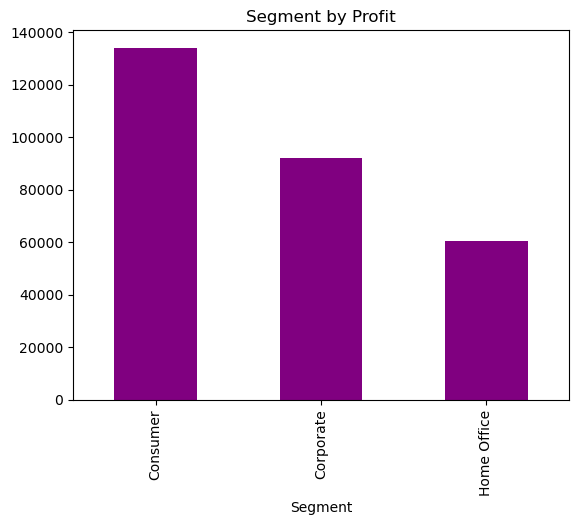

In [55]:
# segment by profit
superstore.groupby('Segment')['Profit'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Segment by Profit") 
plt.show()

#### Consumer have the highest Profit follow by Corporate and Hom Office

### Category Analysis

In [56]:
superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False).to_frame()

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


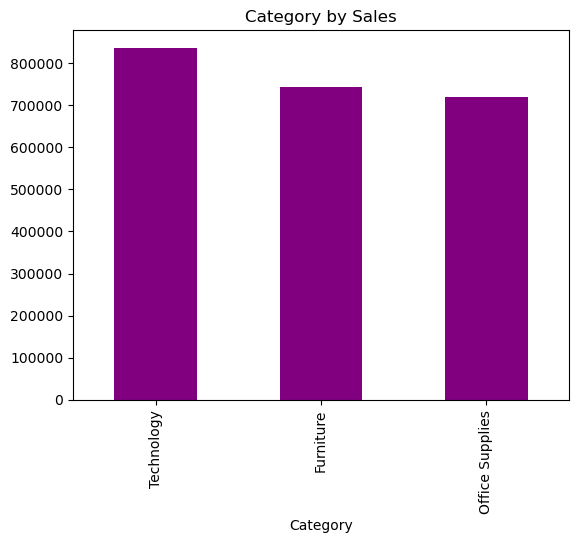

In [57]:
# Category by sales
superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Category by Sales") 
plt.show()

#### Technology has the highest revenue follow by furniture and Office Suppliers

In [58]:
superstore.groupby('Category')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


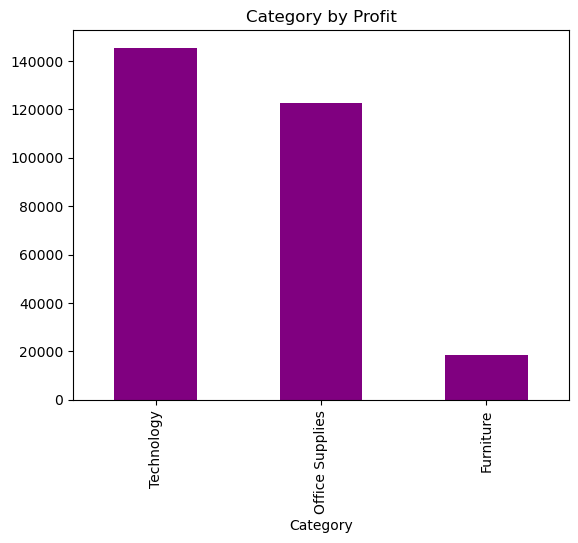

In [59]:
# Category by profit
superstore.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Category by Profit") 
plt.show()

#### Technology has the highest Profit follow by Office Suppliers and Furniture

### Shipping Mode Analysis

In [60]:
superstore.groupby('Ship_Mode')['Sales'].sum().sort_values(ascending=False).to_frame()

,Sales
Ship_Mode,
Standard Class,1.358216e+06
Second Class,4.591936e+05
First Class,3.514284e+05
Same Day,1.283631e+05


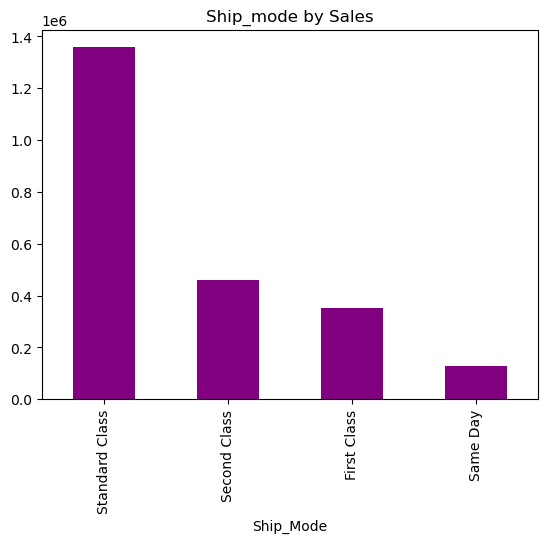

In [61]:
# ship_mode by sales
superstore.groupby('Ship_Mode')['Sales'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Ship_mode by Sales") 
plt.show()

In [62]:
superstore.groupby('Ship_Mode')['Profit'].sum().sort_values(ascending=False).to_frame()

,Profit
Ship_Mode,
Standard Class,164088.7875
Second Class,57446.6354
First Class,48969.8399
Same Day,15891.7589


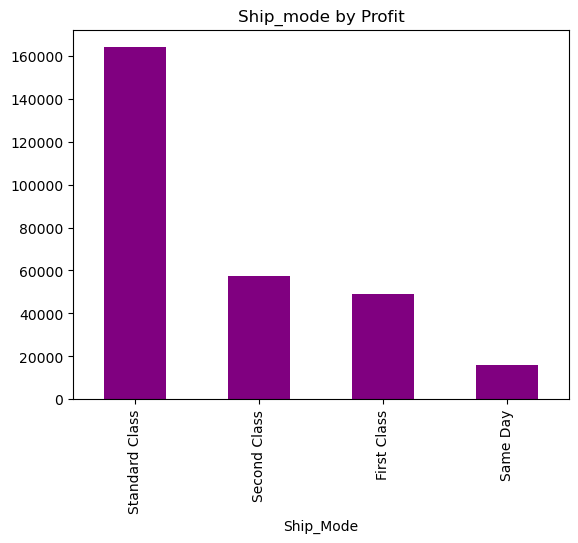

In [63]:
# ship_mose by profit
superstore.groupby('Ship_Mode')['Profit'].sum().sort_values(ascending=False).plot.bar(color='Purple')
plt.title("Ship_mode by Profit") 
plt.show()

### Does shipping mode have effect on sales and profit

From the analysis on shipping mode on sales and profit, the shipping mode have effect on sales and profit, out of the four mode of shipping, the standard class alone contribute about 60% to both sales and profit, this show that the  mode of shipping is one of the major factor that determine company revenue and profit

### Time Series Analysis

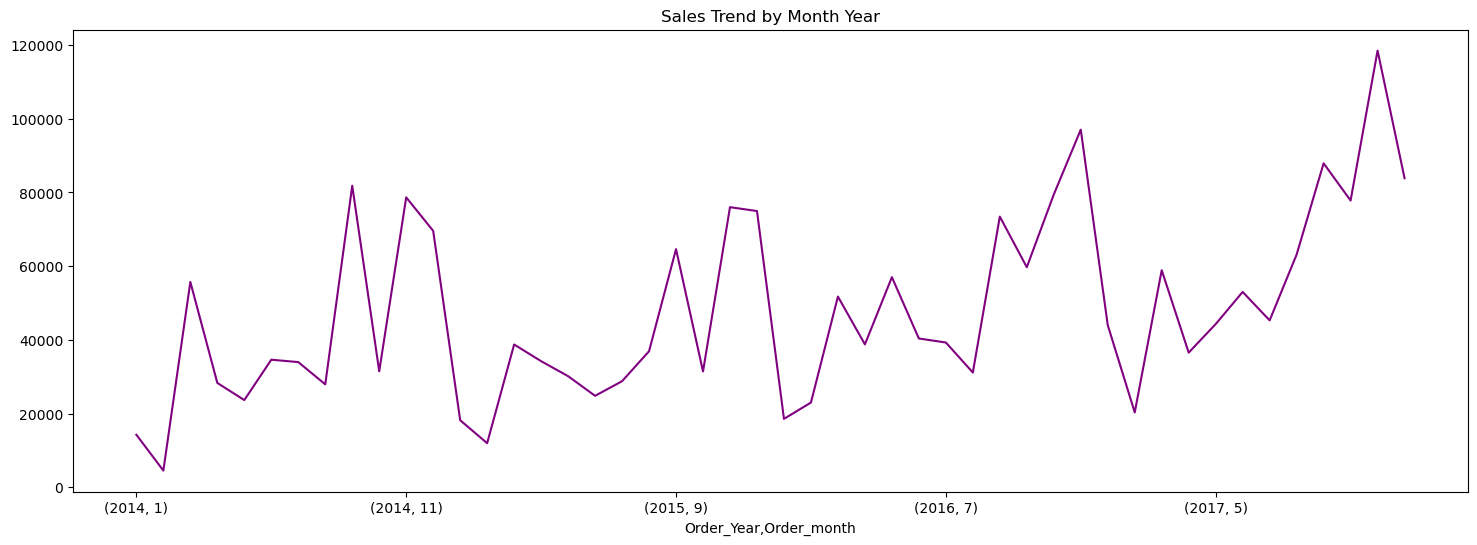

In [64]:
# sales trend by month
plt.figure(figsize=(18,6))
superstore.groupby(['Order_Year','Order_month'])['Sales'].sum().plot(color='Purple')
plt.title("Sales Trend by Month Year") 
plt.show()

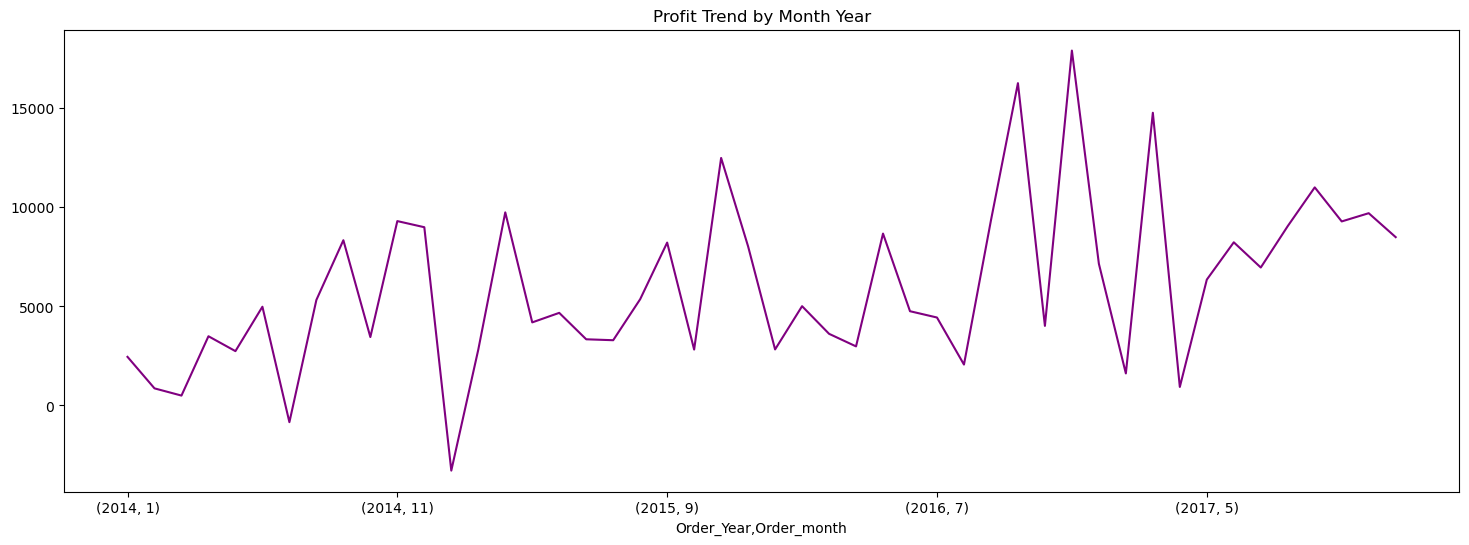

In [65]:
plt.figure(figsize=(18,6))
superstore.groupby(['Order_Year','Order_month'])['Profit'].sum().plot(color='Purple')
plt.title("Profit Trend by Month Year") 
plt.show()

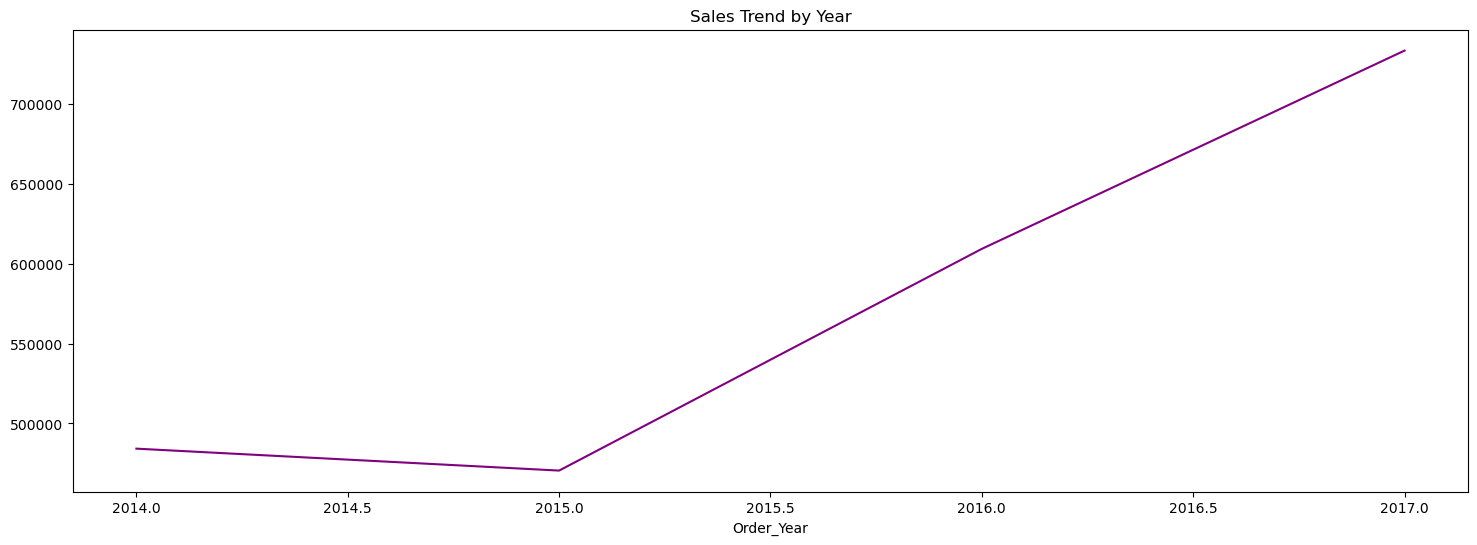

In [66]:
# Sales by year Trend
plt.figure(figsize=(18,6))
superstore.groupby(['Order_Year'])['Sales'].sum().plot(color='Purple')
plt.title("Sales Trend by Year") 
plt.show()

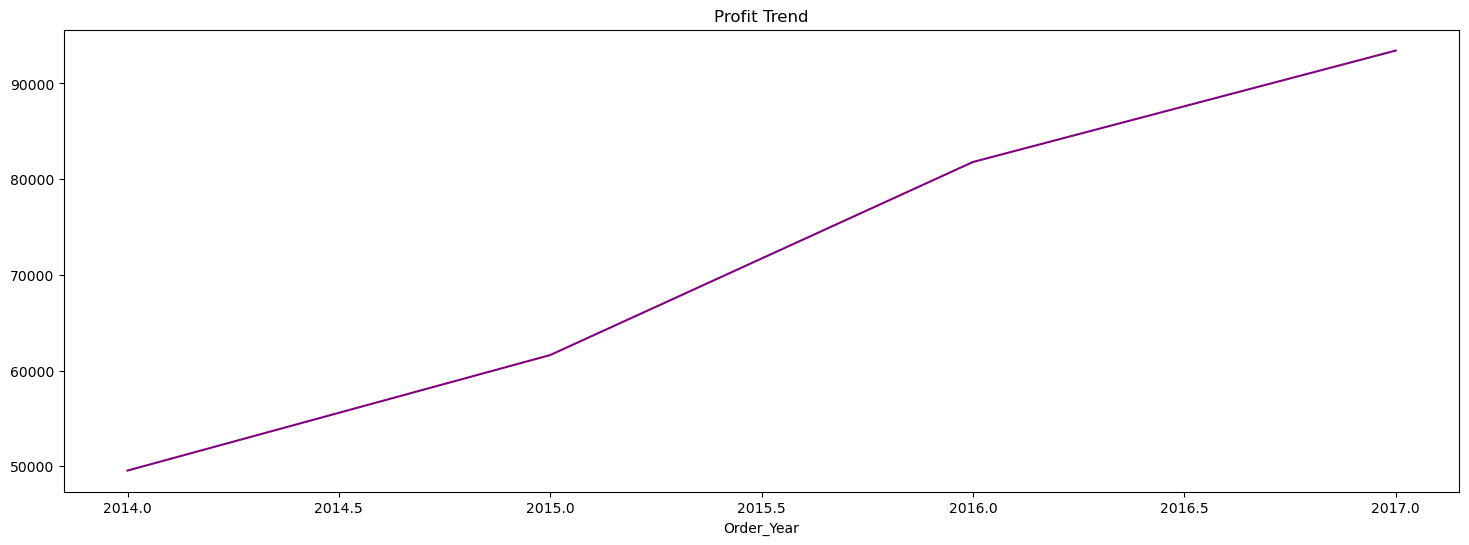

In [67]:
# Profit trend by Year
plt.figure(figsize=(18,6))
superstore.groupby(['Order_Year'])['Profit'].sum().plot(color='Purple')
plt.title("Profit Trend") 
plt.show()

### Discount Analysis

#### Does discount have effect on Sales and profit

In [68]:
dis_info = superstore.groupby('Discount').sum()[[ 'Sales' , 'Profit','Quantity']].reset_index()
dis_info

,Discount,Sales,Profit,Quantity
0,0.00,1.087908e+06,320987.6032,18267
1,0.10,5.436935e+04,9029.1770,373
2,0.15,2.755852e+04,1418.9915,198
3,0.20,7.645944e+05,90337.3060,13660
4,0.30,1.032267e+05,-10369.2774,849
5,0.32,1.449346e+04,-2391.1377,105
6,0.40,1.164178e+05,-23057.0504,786
7,0.45,5.484974e+03,-2493.1111,45
8,0.50,5.891854e+04,-20506.4281,241
9,0.60,6.644700e+03,-5944.6552,501


### From the tables above on discount analysis-
This show that discount rate have negative impact on the business, if the business is considering a discount on any of their product, it should not be more than 20%, any discount above 20% will be a loss to the business. 

### Insigth

* Total Customer is 793
* Total Order by Order_ID is 5009
* Total Sales 2,297,397
* Total Profit 286,397
* Total Product sold 37,873
* Minimum Sale 0.44
* Average Sales 229.8
* Maximum Sales 22,633.8
* The State with the highest Sales and Profit is Califonia
* The City with the highest Sales and Profit is New York Cities
* Standard Shipping mode has the highest sales and profit
* Canon imageCLASS 2200 Advanced Copier is the product with the highest revenue and profit
* In the Sub category Phone has the highest revenue and Copiers have the highest Profit
* West Region has the highest revenue and profit
* In the Category Technology has the highest profit and sales
* Standard shipping mode has the highest sales and profit

### Recommendation

* The discount rate on any product should not be more than 20% to avoid future loss.
* The Company should gave much prioty to order with standard shipping mode
* The company should consider expansion of business in the following state, New-York, Washington, Michigan and Virginia